# CO oxidation in a CSTR

## Load input files

In [1]:
from pycatkin.functions.load_input import read_from_input_file

sim_system_Au = read_from_input_file(input_path='input_AuPd.json')
sim_system_Pd = read_from_input_file(input_path='input_Pd111.json')


Loading input file: input_AuPd.json.
Reading states:
* s
* sCO
* sO
* CO
* O2
* CO2
Reading scaling relation states:
* SRTS
Reading system:
* Pressure: 100000 Pa
* Temperature: 423 K
Reading reactions:
* CO_ads
* O2_ads
* CO_ox
Reading reactor:
* CSTReactor
Done.
Loading input file: input_Pd111.json.
Reading states:
* s
* sCO
* sO
* CO
* O2
* CO2
Reading scaling relation states:
* SRTS
Reading system:
* Pressure: 100000 Pa
* Temperature: 423 K
Reading reactions:
* CO_ads
* O2_ads
* CO_ox
Reading reactor:
* CSTReactor
Done.


## View the states using ASE

In [2]:
from pycatkin.functions.presets import draw_states
import os

if not os.path.isdir('figures'):
    os.mkdir('figures')

draw_states(sim_system=sim_system_Au,
            fig_path='figures/AuPd/')  # rotation='-90x'


Directory does not exist. Will try creating it...
Scaling state SRTS has no atoms to view.


## Save the states in proteindatabank (.pdb) format

In [3]:
import os

if not os.path.isdir('figures'):
    os.mkdir('figures')

for s in sim_system_Pd.snames:
    if sim_system_Pd.states[s].state_type != 'TS':
        sim_system_Pd.states[s].save_pdb(path='figures/Pd111/')


Directory does not exist. Will try creating it...


## Run simulations for a range of temperatures

In [4]:
from pycatkin.functions.presets import run_temperatures
import os
import numpy as np

if not os.path.isdir('outputs'):
    os.mkdir('outputs')

temperatures = np.linspace(start=423, stop=623, num=20, endpoint=True)

for sysname, sim_system in [['AuPd', sim_system_Au], ['Pd111', sim_system_Pd]]:
    run_temperatures(sim_system=sim_system,
                     temperatures=temperatures,
                     steady_state_solve=True,
                     plot_results=False,
                     save_results=True,
                     fig_path='figures/%s/' % sysname,
                     csv_path='outputs/%s/' % sysname)


Running simulations for T in [423.0 K, 623.0 K]...
* 423 K done
* 434 K done
* 444 K done
* 455 K done
* 465 K done
* 476 K done
* 486 K done
* 497 K done
* 507 K done
* 518 K done
* 528 K done
* 539 K done
* 549 K done
* 560 K done
* 570 K done
* 581 K done
* 591 K done
* 602 K done
* 612 K done
* 623 K done
Directory does not exist. Will try creating it...
Running simulations for T in [423.0 K, 623.0 K]...
* 423 K done
* 434 K done
* 444 K done
* 455 K done
* 465 K done
* 476 K done
* 486 K done
* 497 K done
* 507 K done
* 518 K done
* 528 K done
* 539 K done
* 549 K done
* 560 K done
* 570 K done
* 581 K done
* 591 K done
* 602 K done
* 612 K done
* 623 K done
Directory does not exist. Will try creating it...


## Compute and plot conversion across the reactor

d:\users\astrid\dropbox\chalmers\simulations\microkinetics\pycatkin\pycatkin\functions\presets.py:556: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


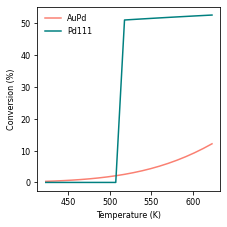

In [5]:
from pycatkin.functions.presets import plot_data_simple
import os
import pandas as pd

fig, ax = None, None
if not os.path.isdir('figures'):
    os.mkdir('figures')

for sysname, sim_system in [['AuPd', sim_system_Au], ['Pd111', sim_system_Pd]]:

    df = pd.read_csv(filepath_or_buffer='outputs/%s/pressures_vs_temperature.csv' % sysname)

    pCOin = sim_system_Pd.params['inflow_state']['CO']
    pCOout = df['pCO (bar)'].values
    xCO = 100.0 * (1.0 - pCOout / pCOin)

    fig, ax = plot_data_simple(fig=fig,
                               ax=ax,
                               xdata=temperatures,
                               ydata=xCO,
                               xlabel='Temperature (K)',
                               ylabel='Conversion (%)',
                               label=sysname,
                               addlegend=True,
                               color='teal' if sysname == 'Pd111' else 'salmon',
                               fig_path='figures/',
                               fig_name='conversion')
